# Exploratory data analysis (EDA)

## Data description

You are provided with the dataset made up of file data.csv which represents the data collected using a CRM (customer relationship management) system that captures the activities of a group of sales reps with customers (physicians). Each sales rep is associated with a fixed number of customers and with the actions performed during a fixed-length time period. In particular, the actions that can be performed are:
* F2F (Face-to-Face) interaction
* Email
* Webinar invitation/participation
* Conference invitation/participation

The file contains the elements presented in the following table, where the `xx` varies from 01 to 12.

|Features                 |Description |
|:------------------------|:-|
|`id `                      |(Row id – Integer)|
|`customer_id`              |(Integer)|
|`rep_id`                   |(Integer)|
|`conference_total_xx`      |based on a sliding window of 3 months for a total of 12 months<br />  e.g. conference_total_12 indicates the total number of conference <br />  invitations in the 3 months previous to December – excluded). <br /> See the following example for further details.|
|`email_open_total_xx`      |as above|
|`f2f_total_xx`             | as above|
|`prescription_total_xx`    | as above (cumulated prescriptions done by each customer)|
|`webinar_total_xx`         | as above|
|`office_or_hospital_based` |(either “office” or “hospital”, indicating whether it’s a public or private practice)|
|`gender`                   |(Boolean - “Male” = True, “Female” = False)|
|`is_cardiologist`          |(Boolean)|
|`is_gp`                    |(Boolean) (gp = General Practioner)|
|`years_since_graduation`   |(Number)|


In [156]:
# importing libraries
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import sweetviz as sv
from pandas.plotting import scatter_matrix
from quickda.clean_data import *
from quickda.explore_categoric import *
from quickda.explore_data import *
from quickda.explore_numeric import *
from quickda.explore_time_series import *
from sklearn.preprocessing import OneHotEncoder

# user-defined functions
sys.path.append("../src")
from utility import *

## Data loading

In [2]:
# allow more rows and columns to be shown when using the method df.head()
pd.set_option("max_rows", 300, "max_columns", 300)

In [3]:
df = pd.read_csv("../data/data.csv")

In [4]:
df.head()

id  customer_id  rep_id  conference_total_01  conference_total_02  \
0   0          100     100                    0                    0   
1   1          101     101                    0                    0   
2   2          102     101                    0                    0   
3   3          103     102                    0                    0   
4   4          104     103                    1                    0   

   conference_total_03  conference_total_04  conference_total_05  \
0                    0                    1                    0   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    0                    0   
4                    0                    0                    0   

   conference_total_06  conference_total_07  conference_total_08  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    1                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   conference_total_09  conference_total_10  conference_total_11  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   conference_total_12  email_open_total_01  email_open_total_02  \
0                    0                    0                    0   
1                    0                    1                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    1   

   email_open_total_03  email_open_total_04  email_open_total_05  \
0                    1                    0                    3   
1                    0                    4                    2   
2                    0                    0                    3   
3                    0                    0                    0   
4                    0                    3                    1   

   email_open_total_06  email_open_total_07  email_open_total_08  \
0                    0                    1                    0   
1                    0                    0                    0   
2                    1                    0                    2   
3                    0                    1                    0   
4                    2                    1                    2   

   email_open_total_09  email_open_total_10  email_open_total_11  \
0                    0                    3                    1   
1                    2                    2                    2   
2                    1                    0                    0   
3                    1                    0                    1   
4                    1                    1                    2   

   email_open_total_12  f2f_total_01  f2f_total_02  f2f_total_03  \
0                    1             4             2             4   
1                    1             1             0             0   
2                    0             2             1             1   
3                    0             0             0             0   
4                    2             3             2             3   

   f2f_total_04  f2f_total_05  f2f_total_06  f2f_total_07  f2f_total_08  \
0             8             8             6             4             7   
1             1             1             2             1             1   
2             0             2             3             6             4  

In [5]:
dataset_dimensions(df)

Dimensions of the dataset:
 Number of rows: 8349
 Number of columns: 68



In [6]:
column_missing_values(df)

Columns with missing values:



office_or_hospital_based    5
years_since_graduation      1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        8349 non-null   int64  
 1   customer_id               8349 non-null   int64  
 2   rep_id                    8349 non-null   int64  
 3   conference_total_01       8349 non-null   int64  
 4   conference_total_02       8349 non-null   int64  
 5   conference_total_03       8349 non-null   int64  
 6   conference_total_04       8349 non-null   int64  
 7   conference_total_05       8349 non-null   int64  
 8   conference_total_06       8349 non-null   int64  
 9   conference_total_07       8349 non-null   int64  
 10  conference_total_08       8349 non-null   int64  
 11  conference_total_09       8349 non-null   int64  
 12  conference_total_10       8349 non-null   int64  
 13  conference_total_11       8349 non-null   int64  
 14  conferen

In [8]:
df["f2f_total_12"].value_counts()

0    8349
Name: f2f_total_12, dtype: int64

In [9]:
df["prescription_total_01"].unique()

array([0])

In [10]:
df["prescription_total_08"].unique()

array([0])

In [11]:
df["office_or_hospital_based"].value_counts()

Office      7416
Hospital     928
Name: office_or_hospital_based, dtype: int64

In [12]:
df["gender"].value_counts()

False    5472
True     2877
Name: gender, dtype: int64

In [13]:
df["is_cardiologist"].value_counts(normalize=True)

False    0.879866
True     0.120134
Name: is_cardiologist, dtype: float64

In [14]:
df["is_gp"].value_counts()

True     7346
False    1003
Name: is_gp, dtype: int64

In [15]:
df["years_since_graduation"].unique()

array([23., 27., 29., 22., 44., 35., 42., 45., 19., 21., 43., 48., 32.,
       36., 37., 41., 26., 47., 31., 38., 46., 39., 18., 20., 40., 25.,
       34., 30., 33., 28., 13., 16., 50., 51., 52., 14., 15., 17., 49.,
       24., 12., 11., 10.,  9.,  8.,  7.,  6.,  5., 55., 53., 56., 63.,
       57., 54., 58., 59., 60., 68.,  4., nan,  3.])

## Data cleaning

### Missing values
The following columns has missing values:
* `office_or_hospital_based`: 5
* `years_since_graduation`: 1
Since there are only a few missing values, we can remove them.

### Useless information
The column `id` contains only a sequential number and no not add any important information, so we can delete this column.

### Converting boolean/object to categorical
The columns `gender`, `is_cardiologist` and `is_gp` contain boolean values, so we can transform them to categorical ones.     

The column `office_or_hospital_based` contains object values and we will can transform them to categorical ones.

### Converting float to int
The column `years_since_graduation` format is float, but there is no need for that, so we can convert it to integer.

### Cardiologists _versus_ General Practitioners 
The dataset contains:
* 7346(88%) General Practitioners
* 1003(12%) Cardiologist 

Both columns present the same information, but with inverted values. We can just substitute `True=1` and `False=0` in both columns, there is no need to apply one-hot encoding here.

In [16]:
# peform data cleaning using user-defined function
df = data_cleaning(df)

In [17]:
column_missing_values(df)

Columns with missing values:



Series([], dtype: int64)

In [18]:
column_unique_values(df)

                      id: 8343
             customer_id: 8343
                  rep_id: 153
     conference_total_01: 4
     conference_total_02: 4
     conference_total_03: 3
     conference_total_04: 4
     conference_total_05: 3
     conference_total_06: 3
     conference_total_07: 4
     conference_total_08: 3
     conference_total_09: 4
     conference_total_10: 4
     conference_total_11: 3
     conference_total_12: 4
     email_open_total_01: 7
     email_open_total_02: 6
     email_open_total_03: 8
     email_open_total_04: 7
     email_open_total_05: 7
     email_open_total_06: 7
     email_open_total_07: 8
     email_open_total_08: 8
     email_open_total_09: 8
     email_open_total_10: 7
     email_open_total_11: 8
     email_open_total_12: 7
            f2f_total_01: 19
            f2f_total_02: 20
            f2f_total_03: 20
            f2f_total_04: 22
            f2f_total_05: 21
            f2f_total_06: 20
            f2f_total_07: 18
            f2f_total_08: 19
    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8343 entries, 0 to 8342
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        8343 non-null   int64   
 1   customer_id               8343 non-null   int64   
 2   rep_id                    8343 non-null   int64   
 3   conference_total_01       8343 non-null   int64   
 4   conference_total_02       8343 non-null   int64   
 5   conference_total_03       8343 non-null   int64   
 6   conference_total_04       8343 non-null   int64   
 7   conference_total_05       8343 non-null   int64   
 8   conference_total_06       8343 non-null   int64   
 9   conference_total_07       8343 non-null   int64   
 10  conference_total_08       8343 non-null   int64   
 11  conference_total_09       8343 non-null   int64   
 12  conference_total_10       8343 non-null   int64   
 13  conference_total_11       8343 non-null   int64 

### Gender, physicians, practice

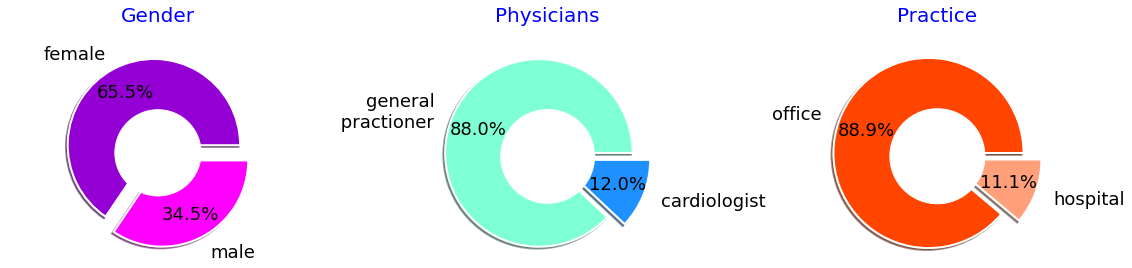

In [20]:
# donut plots
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

# gender
plt.subplot(1, 3, 1)
plt.axis('equal')
plt.margins(0, 0)
plot_donut(df_col=df["gender"], 
           fig_title='Gender', 
           labels=["female", "male"], 
           explode=(0.1, 0.1),
           colors=['darkviolet', 'fuchsia'],
           plt=plt
)

# physician
plt.subplot(1, 3, 2)
plt.axis('equal')
plt.margins(0, 0)
plot_donut(df_col=df["is_cardiologist"], 
           fig_title='Physicians', 
           labels=["general\n practioner", "cardiologist"], 
           explode=(0.1, 0.1),
           colors=['aquamarine', 'dodgerblue'],
           plt=plt
)

# practice
plt.subplot(1, 3, 3)
plt.axis('equal')
plt.margins(0, 0)
plot_donut(df_col=df["office_or_hospital_based"], 
           fig_title='Practice', 
           labels=["office", "hospital"], 
           explode=(0.1, 0.1),
           colors=['orangered', 'lightsalmon'],
           plt=plt
)

plt.show()
plt.close()

#### Years after graduation

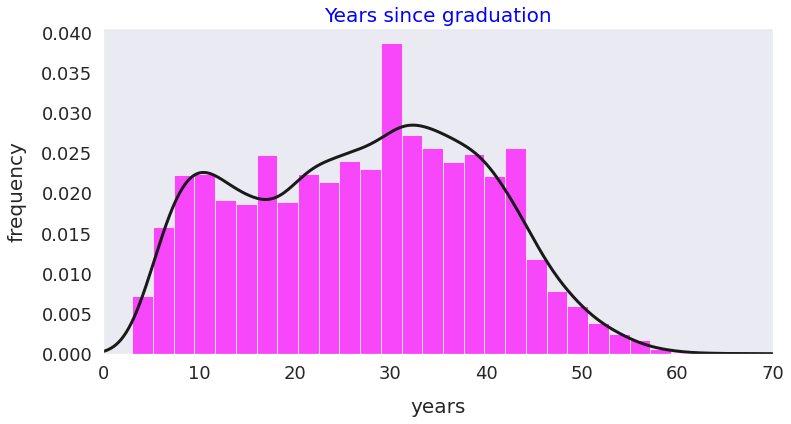

In [21]:
# years since graduation
fig, ax = plt.subplots(figsize=(12,6))

graduation = df['years_since_graduation']
graduation.plot.kde(ax=ax, legend=False, title='Years since graduation', color='k', linewidth=3)
graduation.plot.hist(density=True, bins=30, ax=ax, fontsize=14, alpha=0.7, color='fuchsia')
ax.set_ylabel('frequency',size=20, labelpad=15)
ax.set_xlabel('years', size=20, labelpad=15)

plt.xlim([0, 70])
plt.grid()
plt.tick_params(axis='both', labelsize=18, pad=5)

plt.show()
plt.close()

In [22]:
#df_id = df[['rep_id', 'customer_id']]

In [128]:
#df['rep_id'].value_counts(normalize=False).sort_values(ascending=True)

In [75]:
#df_id.groupby(['rep_id', 'customer_id']).size().unstack().plot(kind='bar', width=0.4, stacked=False,figsize=(10,6))
#plt.legend(loc='center')
#plt.show()

df_rep = df['rep_id'].value_counts().sort_index(ascending=True)
s = df_rep.to_frame().reset_index()
s.shape, s.columns, s.head()


((153, 2),
 Index(['index', 'rep_id'], dtype='object'),
    index  rep_id
 0    100      91
 1    101      79
 2    102     360
 3    103      33
 4    104      31)

In [88]:
s.rep_id.min()

1

### Distribution of customers between sales representatives

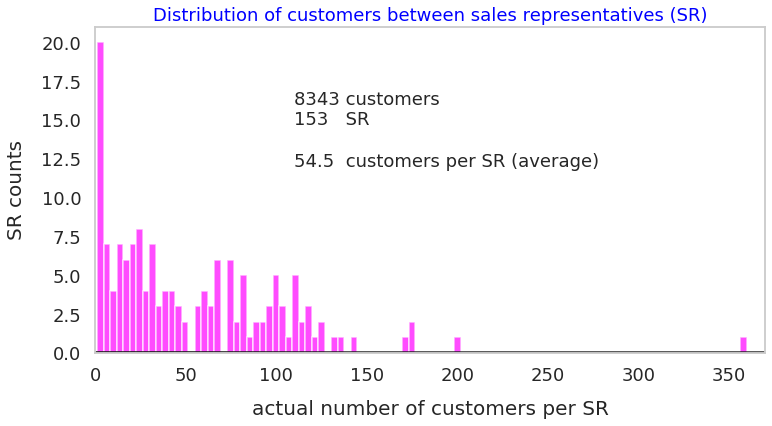

In [155]:
# ysales representatives per customers
fig, ax = plt.subplots(figsize=(12,6))

#graduation = df['rep_id']
graduation = s['rep_id']
graduation.plot.kde(ax=ax, legend=False, title='Distribution of customers between sales representatives (SR)', color='k', linewidth=3)
graduation.plot.hist(density=False, bins=100, ax=ax, fontsize=14, alpha=0.7, color='fuchsia')
ax.set_ylabel('SR counts',size=20, labelpad=15)
ax.set_xlabel('actual number of customers per SR', size=20, labelpad=15)

plt.xlim([0, 370])
plt.grid()
plt.tick_params(axis='both', labelsize=18, pad=5)
plt.text(110, 12,'8343 customers\n153   SR\n \n54.5  customers per SR (average) ', fontsize = 18)
#plt.xticks(np.arange(0, 360+1, 25))

plt.show()
plt.close()

## Rearranging the dataset

For each unique id in a row we will create 12 news rows where each one corresponds to the 12 time windows presented in the dataset. Then, all the 12 columns `conference_total_xx`, `email_open_total_xx`, `f2f_total_xx`, `prescription_total_xx`, `webinar_totalthat_xx` for each row, will be transposed to the correspondent time window id columns. The dataset will increase in the number of rows and decrease in the number of columns.

In [20]:
# create `time_window_id` column and transpose some columns to rows

df_trans = pd.wide_to_long(
    df,
    stubnames=[
        "conference_total",
        "email_open_total",
        "f2f_total",
        "prescription_total",
        "webinar_total",
    ],
    i=[
        "id",
        "customer_id",
        "rep_id",
        "office_or_hospital_based",
        "gender",
        "is_cardiologist",
        "is_gp",
        "years_since_graduation",
    ],
    j="time_window_id",
    sep="_",
).reset_index()

In [21]:
df_trans.head(14)

id  customer_id  rep_id office_or_hospital_based  gender  is_cardiologist  \
0    0          100     100                   Office  female                0   
1    0          100     100                   Office  female                0   
2    0          100     100                   Office  female                0   
3    0          100     100                   Office  female                0   
4    0          100     100                   Office  female                0   
5    0          100     100                   Office  female                0   
6    0          100     100                   Office  female                0   
7    0          100     100                   Office  female                0   
8    0          100     100                   Office  female                0   
9    0          100     100                   Office  female                0   
10   0          100     100                   Office  female                0   
11   0          100     100                   Office  female                0   
12   1          101     101                   Office    male                0   
13   1          101     101                   Office    male                0   

    is_gp  years_since_graduation  time_window_id  conference_total  \
0       1                      23               1                 0   
1       1                      23               2                 0   
2       1                      23               3                 0   
3       1                      23               4                 1   
4       1                      23               5                 0   
5       1                      23               6                 0   
6       1                      23               7                 0   
7       1                      23               8                 0   
8       1                      23               9                 1   
9       1                      23              10                 0   
10      1                      23              11                 0   
11      1                      23              12                 0   
12      1                      27               1                 0   
13      1                      27               2                 0   

    email_open_total  f2f_total  prescription_total  webinar_total  
0                  0          4                   0              0  
1                  0          2                   0              0  
2                  1          4                   0              0  
3                  0          8                   0              0  
4                  3          8                   0              0  
5                  0          6                   3              2  
6                  1          4                   0              2  
7                  0          7                   0              3  
8                  0          9                   0              1  
9                  3         10                   0              1  
10                 1          8                   0              0  
11                 1          0                   0              0  
12                 1          1                   0              0  
13                 1          0                   0              0

In [22]:
dataset_dimensions(df_trans)

Dimensions of the dataset:
 Number of rows: 100116
 Number of columns: 14



In [23]:
column_unique_values(df_trans)

                      id: 8343
             customer_id: 8343
                  rep_id: 153
office_or_hospital_based: 2
                  gender: 2
         is_cardiologist: 2
                   is_gp: 2
  years_since_graduation: 60
          time_window_id: 12
        conference_total: 4
        email_open_total: 8
               f2f_total: 23
      prescription_total: 32
           webinar_total: 10


In [24]:
column_missing_values(df_trans)

Columns with missing values:



Series([], dtype: int64)

In [28]:
df_trans["prescription_total"].value_counts(normalize=False)

0     86554
1      4981
2      4108
3      1786
4      1031
5       565
6       339
7       199
8       151
9        99
10       63
11       53
13       43
15       25
12       21
14       17
17       16
16       12
21       10
23       10
18        7
19        5
29        5
22        3
30        3
25        2
26        2
34        2
20        1
35        1
40        1
42        1
Name: prescription_total, dtype: int64

In [29]:
df.describe()

id  customer_id       rep_id  conference_total_01  \
count  8343.000000  8343.000000  8343.000000          8343.000000   
mean   4172.636821  4272.636821   154.272084             0.104159   
std    2410.210279  2410.210279    36.610658             0.322289   
min       0.000000   100.000000   100.000000             0.000000   
25%    2085.500000  2185.500000   124.000000             0.000000   
50%    4172.000000  4272.000000   149.000000             0.000000   
75%    6260.500000  6360.500000   185.000000             0.000000   
max    8348.000000  8448.000000   252.000000             3.000000   

       conference_total_02  conference_total_03  conference_total_04  \
count          8343.000000          8343.000000          8343.000000   
mean              0.097567             0.097447             0.103320   
std               0.314780             0.311564             0.322373   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               3.000000             2.000000             3.000000   

       conference_total_05  conference_total_06  conference_total_07  \
count          8343.000000          8343.000000          8343.000000   
mean              0.099844             0.103680             0.095289   
std               0.313492             0.321326             0.305634   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               2.000000             2.000000             3.000000   

       conference_total_08  conference_total_09  conference_total_10  \
count          8343.000000          8343.000000          8343.000000   
mean              0.099125             0.098646             0.100443   
std               0.311804             0.311187             0.316536   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               2.000000             3.000000             3.000000   

       conference_total_11  conference_total_12  email_open_total_01  \
count          8343.000000          8343.000000          8343.000000   
mean              0.103080             0.100923             0.996404   
std               0.318711             0.314102             0.980870   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             1.000000   
75%               0.000000             0.000000             2.000000   
max               2.000000             3.000000             7.000000   

       email_open_total_02  email_open_total_03  email_open_total_04  \
count          8343.000000          8343.000000          8343.000000   
mean              0.971713             0.985856             1.015102   
std               0.972119             0.991110             1.001084   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               1.000000             1.000000             1.000000   
75%               2.000000             2.000000             2.000000   
max               5.000000             7.000000             6.000000   

       email_open_total_05  email_open_total_06  email_open_total_07  \
count           8343.00000          8343.000000          8343.000000   
mean 

In [ ]:
# visualize the dataset
# plt.style.use('seaborn-deep')
# scatter_matrix(df, diagonal='kde', range_padding=0.4, marker='+', figsize=(12,12))
# plt.show()

In [ ]:
# generate a HTML report using `sweetviz`
eda_report = sv.analyze(df)
# to automaticaly display the report on your browser set open_browser=True
# save the report
eda_report.show_html("../reports/eda_report.html", scale=0.8, open_browser=False)

In [ ]:
explore(df)

In [ ]:
# summarize dataset with `quickda`
explore(df, method="profile", report_name="Bayer report", is_large_dataset=False)

## Feature engineering

We can apply one-hot encoding to the categorical features `gender` and `office_or_hospital`.

In [30]:
df2 = df_trans.copy()

In [31]:
categorical_columns = ["gender", "office_or_hospital_based"]
df2 = do_one_hot(df=df2, column_list=categorical_columns)

In [ ]:
# df["gender"].unique()

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100116 entries, 0 to 100115
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 100116 non-null  int64  
 1   customer_id                        100116 non-null  int64  
 2   rep_id                             100116 non-null  int64  
 3   is_cardiologist                    100116 non-null  int64  
 4   is_gp                              100116 non-null  int64  
 5   years_since_graduation             100116 non-null  int64  
 6   time_window_id                     100116 non-null  int64  
 7   conference_total                   100116 non-null  int64  
 8   email_open_total                   100116 non-null  int64  
 9   f2f_total                          100116 non-null  int64  
 10  prescription_total                 100116 non-null  int64  
 11  webinar_total                      1001

In [33]:
# convert float to integer
df2["gender_male"] = df2["gender_female"].astype(int)
df2["gender_female"] = df2["gender_female"].astype(int)

df2["office_or_hospital_based_Hospital"] = df2[
    "office_or_hospital_based_Hospital"
].astype(int)
df2["office_or_hospital_based_Office"] = df2["office_or_hospital_based_Office"].astype(
    int
)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100116 entries, 0 to 100115
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   id                                 100116 non-null  int64
 1   customer_id                        100116 non-null  int64
 2   rep_id                             100116 non-null  int64
 3   is_cardiologist                    100116 non-null  int64
 4   is_gp                              100116 non-null  int64
 5   years_since_graduation             100116 non-null  int64
 6   time_window_id                     100116 non-null  int64
 7   conference_total                   100116 non-null  int64
 8   email_open_total                   100116 non-null  int64
 9   f2f_total                          100116 non-null  int64
 10  prescription_total                 100116 non-null  int64
 11  webinar_total                      100116 non-null  int64
 12  ge

In [35]:
df2.head()

id  customer_id  rep_id  is_cardiologist  is_gp  years_since_graduation  \
0   0          100     100                0      1                      23   
1   0          100     100                0      1                      23   
2   0          100     100                0      1                      23   
3   0          100     100                0      1                      23   
4   0          100     100                0      1                      23   

   time_window_id  conference_total  email_open_total  f2f_total  \
0               1                 0                 0          4   
1               2                 0                 0          2   
2               3                 0                 1          4   
3               4                 1                 0          8   
4               5                 0                 3          8   

   prescription_total  webinar_total  gender_female  gender_male  \
0                   0              0              1            1   
1                   0              0              1            1   
2                   0              0              1            1   
3                   0              0              1            1   
4                   0              0              1            1   

   office_or_hospital_based_Hospital  office_or_hospital_based_Office  
0                                  0                                1  
1                                  0                                1  
2                                  0                                1  
3                                  0                                1  
4                                  0                                1

In [36]:
dataset_dimensions(df2)

Dimensions of the dataset:
 Number of rows: 100116
 Number of columns: 16



In [37]:
column_missing_values(df2)

Columns with missing values:



Series([], dtype: int64)

In [ ]:
plot_donut()

In [38]:
# summarize dataset with `quickda`
explore(df2, method="profile", report_name="Bayer report", is_large_dataset=False)

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

/home/smv/anaconda3/envs/bayer/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning:

overflow encountered in long_scalars



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]